In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your actual dataset path)
data = pd.read_csv('dataset.csv')

# Display basic info about the dataset
print(data.info())  # Shows the data types and null values

# Display the first few rows of the dataset
print(data.head())

# Check for non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# If there are non-numeric columns, let's convert them into numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Convert all non-numeric columns to numeric using LabelEncoder
for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Now, display the first few rows of the dataset again to check the transformations
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Missing values per column:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


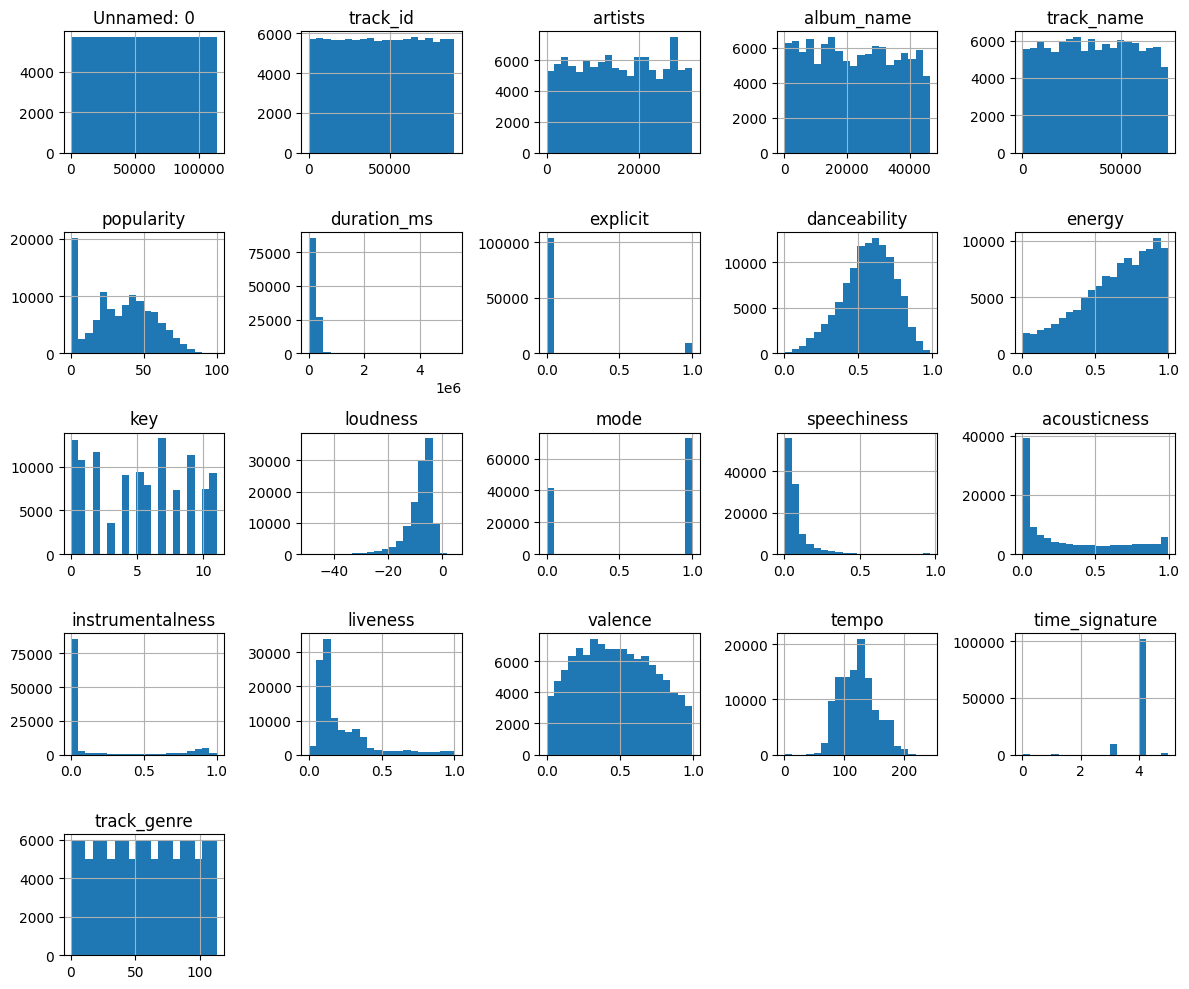

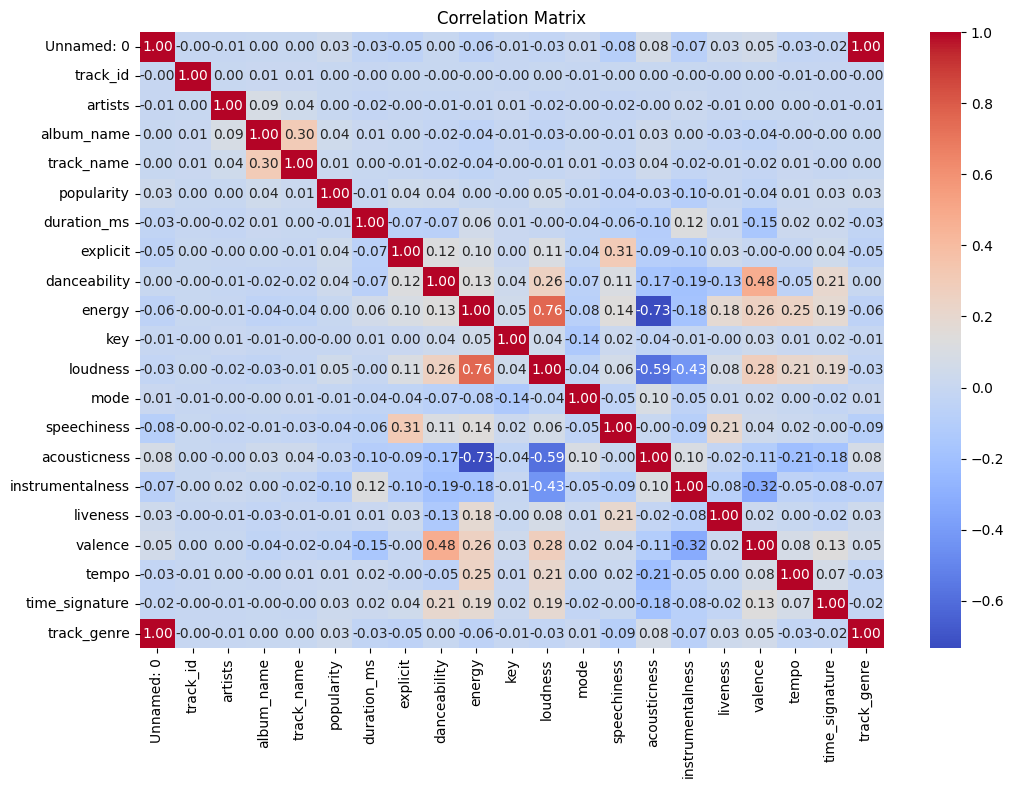

In [2]:
# 1. Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

# 2. Plot histograms for all numerical features
# This will help you understand the distribution of each feature
data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# 3. Correlation matrix to understand relationships between features
correlation_matrix = data.corr()

# 4. Heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Correlation of new feature with target:
             new_feature  popularity
new_feature      1.00000     0.00606
popularity       0.00606     1.00000
Top 10 important features:
Unnamed: 0      0.165036
album_name      0.118719
track_name      0.063277
artists         0.061110
duration_ms     0.056104
acousticness    0.055605
valence         0.045240
loudness        0.044950
speechiness     0.044408
danceability    0.044234
dtype: float64


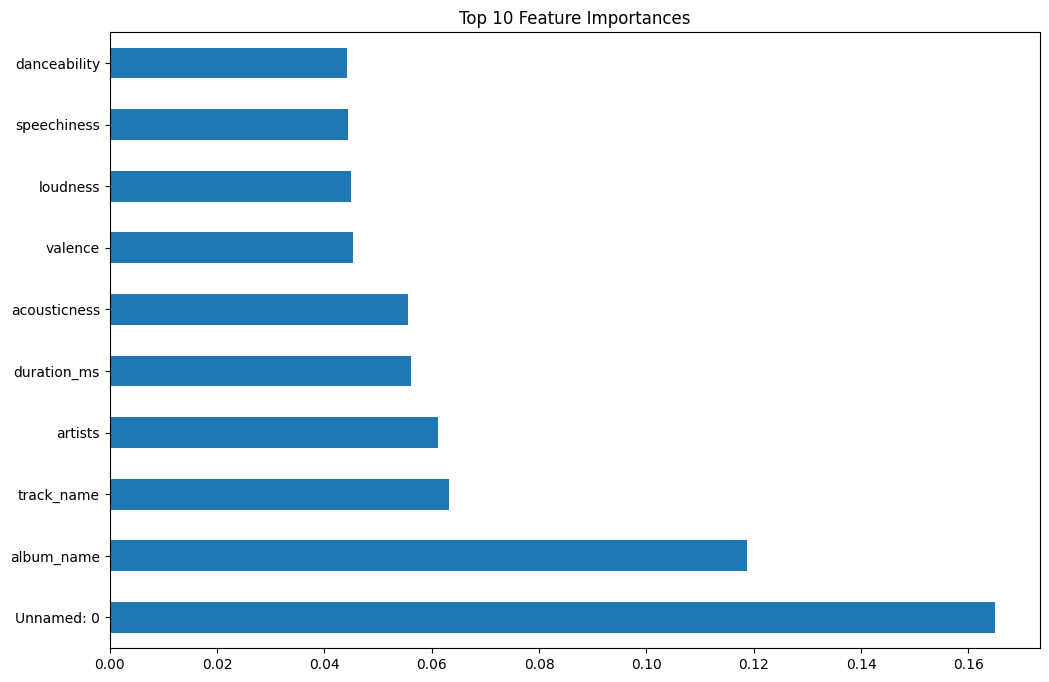

In [3]:
# 1. Feature Engineering - Creating new features
# Example: Adding a new feature as the interaction of two existing features
# Replace 'danceability' and 'energy' with actual column names
data['new_feature'] = data['danceability'] * data['energy']  # Replace with actual columns

# 2. Check correlation of the new feature with the target variable
# Assuming 'popularity' is the target variable
correlation_new_feature = data[['new_feature', 'popularity']].corr()
print(f"Correlation of new feature with target:\n{correlation_new_feature}")

# 3. Feature Importances - Using Random Forest to check feature importances
from sklearn.ensemble import RandomForestRegressor

# Separate the features (X) and target (y)
# Assuming 'popularity' is the target variable
X = data.drop(columns=['popularity'])
y = data['popularity']

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the top 10 most important features
print("Top 10 important features:")
print(feature_importances.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()
